<a href="https://colab.research.google.com/github/szhaider2022/AIPIAICZEESHAN/blob/main/ConvDataTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zeeshanhaideruit","key":"fd208b1eb31a51fd76533a9269713e76"}'}

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600  ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:37<00:00, 22.8MB/s]
100% 812M/812M [00:37<00:00, 22.5MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip

In [7]:
!unzip -qq train.zip

In [8]:
import os, shutil, pathlib

In [9]:
original_dir=pathlib.Path("train")
new_base_dir=pathlib.Path("cat_vs_dogs_small")

In [10]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat","dog"):
    dir=new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames=[f"{category}.{i}.jpg"
            for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,
                      dst=dir/fname)

make_subset("train",start_index=0, end_index=1000)
make_subset("validation",start_index=1000, end_index=1500)
make_subset("test",start_index=1500, end_index=2500)

In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))




In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# import os, shutill
# original_dataset_dir='/Users/fchollet/Downloads/kaggle_original_data'
# /content/dogs-vs-cats.zip

# base_dir='/Users/fchollet/Downloads/cats_vs_dogs_small'
# os.mkdir(base_dir)

# train_dir=os.path.join(base_dir,'train')
# os.mkdir(train_dir)
# validation_dir=os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)
# test_dir=os.path.join(base_dir,'test')
# os.mkdir(test_dir)

# train_cat_dir=os.path.join(train_dir,'cats')
# os.mkdir(train_cat_dir)

In [14]:
from tensorflow.keras import optimizers

In [15]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    'cat_vs_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
      'cat_vs_dogs_small/validation',
      target_size=(150,150),
      batch_size=20,
      class_mode='binary')





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
def generator(x):
  value=0
  while value < x:
    yield value
    value+=1
for value in generator(3):
  print(value)

0
1
2


In [18]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('label_batch_shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
label_batch_shape: (20,)


In [25]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
  1/100 [..............................] - ETA: 9s - loss: 0.7084 - acc: 0.2500

<ipython-input-25-0aa5bffa44dc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


100/100 [==============================] - 11s 109ms/step - loss: 0.6838 - acc: 0.5540 - val_loss: 0.6751 - val_acc: 0.5460
Epoch 2/30
100/100 [==============================] - 10s 98ms/step - loss: 0.6645 - acc: 0.5940 - val_loss: 0.6555 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6504 - acc: 0.6250 - val_loss: 0.6485 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.6187 - acc: 0.6585 - val_loss: 0.6426 - val_acc: 0.6130
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5845 - acc: 0.6890 - val_loss: 0.6107 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 10s 100ms/step - loss: 0.5576 - acc: 0.7085 - val_loss: 0.5992 - val_acc: 0.6640
Epoch 7/30
100/100 [==============================] - 10s 105ms/step - loss: 0.5428 - acc: 0.7190 - val_loss: 0.5975 - val_acc: 0.6700
Epoch 8/30
100/100 [==============================] - 10s 104ms/ste

In [ ]:
model.save('cats_vs_dogs_small_1.h5')

In [21]:
from tensorflow.keras.models import save_model
save_model(model,"cats_vs_dogs_small_1.h5")
#model.load_weights("C:\Users\skhiz\Downloads\cats_vs_dogs_small_1.h5")

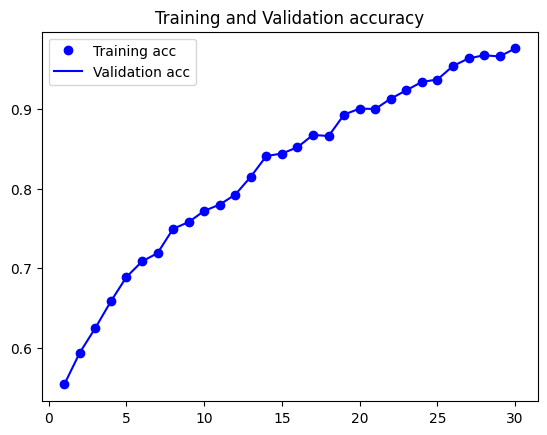

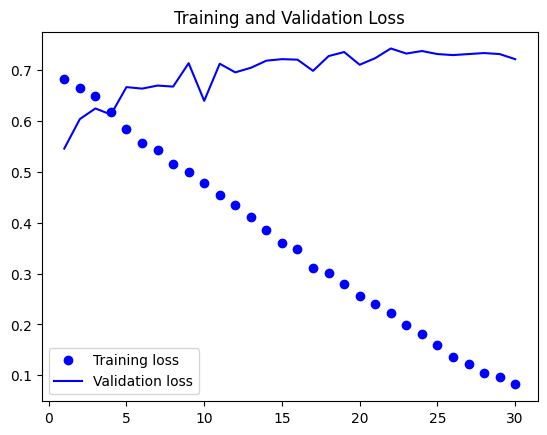

In [26]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_acc']
epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [27]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

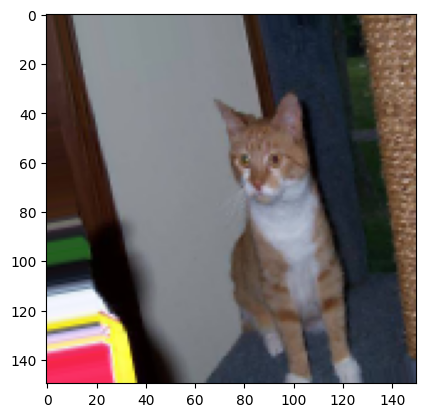

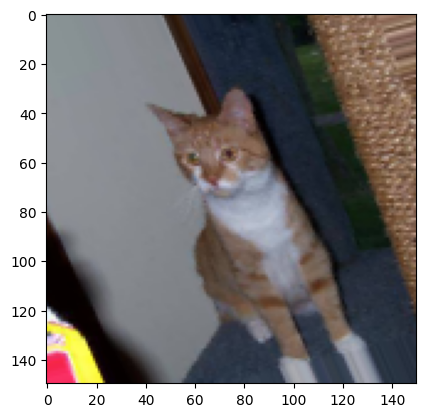

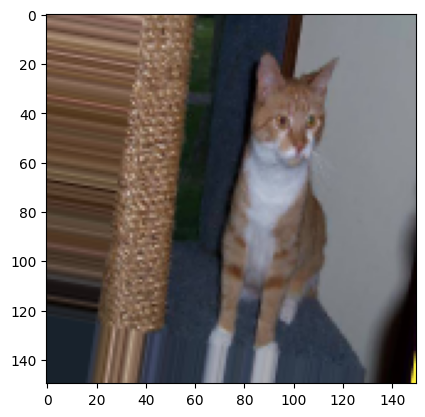

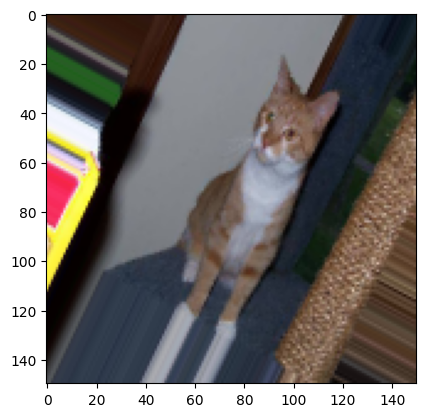

In [28]:
from tensorflow.keras.preprocessing import image

fnames=[os.path.join('cat_vs_dogs_small/train/cat', fname) for
       fname in os.listdir('cat_vs_dogs_small/train/cat')]
img_path=fnames[0]

img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)

x=x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot=plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i % 4 ==0:
    break
plt.show()



In [29]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [36]:
import numpy as np
import tensorflow as tf
random_numbers=np.random.normal(size=(1000,16))
dataset=tf.data.Dataset.from_tensor_slices(random_numbers)

for i, element in enumerate(dataset):
  print(element.shape)
  if i >=2:
    break



(16,)
(16,)
(16,)


In [37]:
batched_dataset=dataset.batch(32)
for i, element in enumerate(batched_dataset):
  print(element.shape)
  if i >=2:
    break

(32, 16)
(32, 16)
(32, 16)


In [40]:
reshaped_dataset=dataset.map(lambda x: tf.reshape(x, (4,4)))
for i, element in enumerate(reshaped_dataset):
  print(element.shape)
  if i >=2:
    break

(4, 4)
(4, 4)
(4, 4)


In [43]:
for data_batch, labels_batch in train_generator:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [45]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True ,)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    'cat_vs_dogs_small/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
    'cat_vs_dogs_small/validation',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<ipython-input-45-7bc8c2263752>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/100
 63/100 [=================>............] - ETA: 9s - loss: 0.6717 - acc: 0.5625

100/100 [==============================] - 20s 201ms/step - loss: 0.6717 - acc: 0.5625 - val_loss: 0.6616 - val_acc: 0.5840
